In [1]:
# !pip3 install gensim

In [1]:
from Corpora import MovieReviewCorpus
from Lexicon import SentimentLexicon
from Statistics import SignTest
from Classifiers import NaiveBayesText, SVMText
from Extensions import SVMDoc2Vec, DocFeaturizer

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec
from sklearn.decomposition import PCA
import seaborn as sns

ax_size = 16
title_size=18

In [9]:
corpus.test[0][1]

['based',
 'on',
 'an',
 'actual',
 'story,',
 'john',
 'boorman',
 'shows',
 'the',
 'struggle',
 'of',
 'an',
 'american',
 'doctor,',
 'whose',
 'husband',
 'and',
 'son',
 'were',
 'murdered',
 'and',
 'she',
 'was',
 'continually',
 'plagued',
 'with',
 'her',
 'loss.',
 'a',
 'holiday',
 'to',
 'burma',
 'with',
 'her',
 'sister',
 'seemed',
 'like',
 'a',
 'good',
 'idea',
 'to',
 'get',
 'away',
 'from',
 'it',
 'all,',
 'but',
 'when',
 'her',
 'passport',
 'was',
 'stolen',
 'in',
 'rangoon,',
 'she',
 'could',
 'not',
 'leave',
 'the',
 'country',
 'with',
 'her',
 'sister,',
 'and',
 'was',
 'forced',
 'to',
 'stay',
 'back',
 'until',
 'she',
 'could',
 'get',
 'i.d.',
 'papers',
 'from',
 'the',
 'american',
 'embassy.',
 'to',
 'fill',
 'in',
 'a',
 'day',
 'before',
 'she',
 'could',
 'fly',
 'out,',
 'she',
 'took',
 'a',
 'trip',
 'into',
 'the',
 'countryside',
 'with',
 'a',
 'tour',
 'guide.',
 '"i',
 'tried',
 'finding',
 'something',
 'in',
 'those',
 'stone',
 '

In [16]:
import numpy as np
SVM=SVMText(bigrams=False,trigrams=False,discard_closed_class=False)
review_tokens = SVM.extractReviewTokens(corpus.test[0][1])
reviews = corpus.train
X = np.array([SVM.extractReviewTokens(review_text) for _, review_text in reviews])
# X=X.reshape(-1,1)
# SVM.train(corpus.train)
np.shape(X)

<ipython-input-16-63c37d9220a9>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([SVM.extractReviewTokens(review_text) for _, review_text in reviews])


(25000,)

In [2]:
# retrieve corpus
corpus=MovieReviewCorpus(stemming=False,pos=False)

# use sign test for all significance testing
signTest=SignTest()

print("--- classifying reviews using sentiment lexicon  ---")

# read in lexicon
lexicon=SentimentLexicon()

# on average there are more positive than negative words per review (~7.13 more positive than negative per review)
# to take this bias into account will use threshold (roughly the bias itself) to make it harder to classify as positive
# todo: vary this!!! 
threshold=8

# TODO Q6 and 6.1
# corpus = MovieReviewCorpus(stemming=False,pos=False,use_imdb=True)
print("--- classifying reviews using SVM 10-fold cross-eval ---")
SVM=SVMText(bigrams=False,trigrams=False,discard_closed_class=False, kernel="linear")
SVM.train(corpus.train)
SVM.test(corpus.test)
svm_preds=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy():.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")
SVM.getMCC()
SVM.crossValidate(corpus)
print(f"Accuracy: {SVM.getAccuracy(cross_val_preds=True):.3f}")
print(f"Std. Dev: {SVM.getStdDeviation()}")

num train: 1800, num test: 200
tot num reviews: 2000
--- classifying reviews using sentiment lexicon  ---
--- classifying reviews using SVM 10-fold cross-eval ---
kernel:  linear
kernel:  linear
Accuracy: 0.84
Std. Dev: 0.09
MCC: 0.68


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

Accuracy: 0.855
Std. Dev: 0.02144761058952721


In [11]:
import numpy as np
C = [0.5, 0.75, 1, 1.25, 1.5, 2]
kernels = ["linear", "poly", "rbf", "sigmoid"]
scores = np.zeros([len(kernels), len(C)])
stdevs = np.zeros([len(kernels), len(C)])
for i, kernel in enumerate(kernels): 
    for j, c in enumerate(C): 
        SVM=SVMText(bigrams=False,trigrams=False,discard_closed_class=False, kernel=kernel, C=c)
        SVM.crossValidate(corpus)
        acc = SVM.getAccuracy()#cross_val_preds=True)
        stdev = SVM.getStdDeviation()
        scores[i, j] = acc
        stdevs[i, j] = stdev

kernel:  linear
kernel:  linear


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  linear
kernel:  linear


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  linear
kernel:  linear


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  linear
kernel:  linear


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  linear
kernel:  linear


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  linear
kernel:  linear


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  poly
kernel:  poly


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  poly
kernel:  poly


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  poly
kernel:  poly


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  poly
kernel:  poly


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  poly
kernel:  poly


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  poly
kernel:  poly


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  rbf
kernel:  rbf


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  rbf
kernel:  rbf


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  rbf
kernel:  rbf


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  rbf
kernel:  rbf


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  rbf
kernel:  rbf


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  rbf
kernel:  rbf


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  sigmoid
kernel:  sigmoid


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  sigmoid
kernel:  sigmoid


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  sigmoid
kernel:  sigmoid


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  sigmoid
kernel:  sigmoid


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  sigmoid
kernel:  sigmoid


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

kernel:  sigmoid
kernel:  sigmoid


/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec
from sklearn.decomposition import PCA
import seaborn as sns

ax_size = 16
title_size=18

No handles with labels found to put in legend.
No handles with labels found to put in legend.


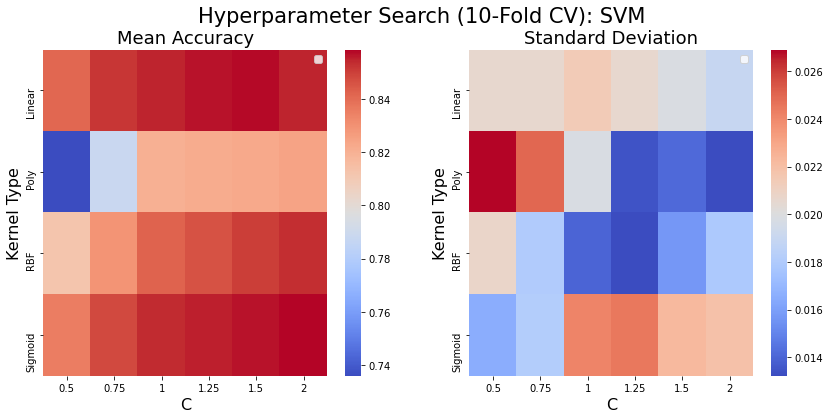

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Hyperparameter Search (10-Fold CV): SVM', fontsize=title_size + 3)

cmap = "coolwarm"
kernel_strs = ["Linear", "Poly", "RBF", "Sigmoid"] 

ax = axes[0]
sns.heatmap(scores,cmap=cmap,yticklabels=kernel_strs,xticklabels=[str(c) for c in C],ax=ax)
ax.set_xlabel("C",fontsize=ax_size)
ax.set_ylabel("Kernel Type",fontsize=ax_size)
ax.set_title(f"Mean Accuracy",fontsize=title_size) 
ax.legend()


ax = axes[1]

sns.heatmap(stdevs,cmap=cmap,ax=ax,yticklabels=kernel_strs,xticklabels=[str(c) for c in C])
ax.set_xlabel("C",fontsize=ax_size)
ax.set_ylabel("Kernel Type",fontsize=ax_size)
ax.set_title(f"Mean Accuracy",fontsize=title_size) 
ax.set_title(f"Standard Deviation",fontsize=title_size) 
ax.legend()

plt.savefig(f"hyperSVM.png", dpi=400, bbox_inches="tight")

<AxesSubplot:>

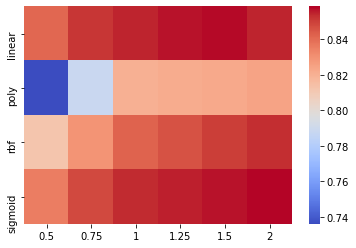

In [16]:
# todo: make into a two panel plot!!
import seaborn as sns
cmap = "coolwarm"
sns.heatmap(scores,cmap=cmap,yticklabels=kernels,xticklabels=[str(c) for c in C])

<AxesSubplot:>

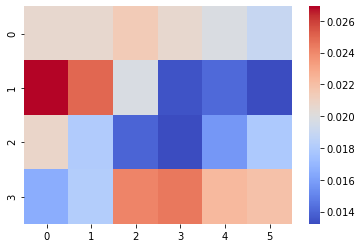

In [13]:
sns.heatmap(stdevs,cmap=cmap)

In [ ]:
num_stemmed_features = len(NB.vocabulary)
num_stemmed_features

In [3]:
# question 1.0
print("--- classifying reviews using Naive Bayes on held-out test set ---")
NB=NaiveBayesText(smoothing=False,bigrams=False,trigrams=False,discard_closed_class=False)
NB.train(corpus.train)
NB.test(corpus.test)
# store predictions from classifier
non_smoothed_preds=NB.predictions
print(f"Accuracy without smoothing: {NB.getAccuracy():.2f}")
NB.getMCC()

--- classifying reviews using Naive Bayes on held-out test set ---
Accuracy without smoothing: 0.43
MCC: -0.13


-0.1324120051262972

In [4]:
# question 2.0
# use smoothing
NB=NaiveBayesText(smoothing=True,bigrams=False,trigrams=False,discard_closed_class=False)
NB.train(corpus.train)
NB.test(corpus.test)
smoothed_preds=NB.predictions
# saving this for use later
num_non_stemmed_features=len(NB.vocabulary)
print(f"Accuracy using smoothing: {NB.getAccuracy():.2f}")
NB.getMCC()
# question 2.1
# see if smoothing significantly improves results
p_value=signTest.getSignificance(non_smoothed_preds,smoothed_preds)
significance = "significant" if p_value < 0.05 else "not significant"
print(f"results using smoothing are {significance} with respect to no smoothing")

Accuracy using smoothing: 0.79
MCC: 0.57
results using smoothing are significant with respect to no smoothing


In [6]:
# question 3.0
print("--- classifying reviews using 10-fold cross-evaluation ---")
# using previous instantiated object
NB.crossValidate(corpus)
# using cross-eval for smoothed predictions from now on
smoothed_preds=NB.predictions
print(f"Accuracy: {NB.getAccuracy(cross_val_preds=True):.3f}")
print(f"Std. Dev: {NB.getStdDeviation()}")

--- classifying reviews using 10-fold cross-evaluation ---


/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])


Accuracy: 0.809
Std. Dev: 0.021731313812100698


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbdf622f190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbdf622f850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbdf6212df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbdf622ff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbdf623a2b0>],
 'means': []}

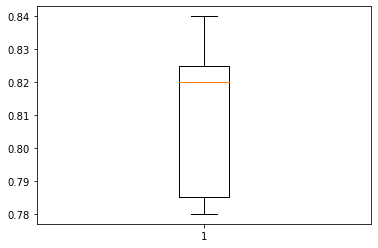

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(NB.score_per_fold)

In [16]:
stemmed_corpus.stemming

True

In [17]:
# question 4.0
print("--- stemming corpus ---")
# retrieve corpus with tokenized text and stemming (using porter)
stemmed_corpus=MovieReviewCorpus(stemming=True,pos=False)
print("--- cross-validating NB using stemming ---")
NB=NaiveBayesText(smoothing=True,bigrams=False,trigrams=False,discard_closed_class=False)
NB.crossValidate(stemmed_corpus)
stemmed_preds=NB.predictions
print(f"Accuracy: {NB.getAccuracy(cross_val_preds=True):.3f}")
print(f"Std. Dev: {NB.getStdDeviation():.3f}")

# TODO Q4.1
# see if stemming significantly improves results on smoothed NB (both did cv)
p_value=signTest.getSignificance(stemmed_preds,smoothed_preds) # note compared against version w/ smoothing! 
significance = "significant" if p_value < 0.05 else "not significant"
print(f"results using stemming are {significance} with respect to no stemming")

# TODO Q4.2
print("--- determining the number of features before/after stemming ---")
# (**) changing the number of features == changing the number of words in the vocab 
NB.train(corpus.train)
NB.test(corpus.test)
num_stemmed_features = len(NB.vocabulary)
print(f"num features, non-stemmed: {num_non_stemmed_features} vs. num features, stemmed: {num_stemmed_features}")

--- stemming corpus ---
num train: 1800, num test: 200
tot num reviews: 2000
--- cross-validating NB using stemming ---


/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])


Accuracy: 0.815
Std. Dev: 0.022
results using stemming are not significant with respect to no stemming
--- determining the number of features before/after stemming ---
num features, non-stemmed: 52777 vs. num features, stemmed: 52777


In [9]:
# question Q5.0
# cross-validate model using smoothing and bigrams
print("--- cross-validating naive bayes using smoothing and bigrams ---")
NB=NaiveBayesText(smoothing=True,bigrams=True,trigrams=False,discard_closed_class=False)
NB.crossValidate(corpus)
smoothed_and_bigram_preds=NB.predictions
print(f"Accuracy: {NB.getAccuracy(cross_val_preds=True):.2f}") 
print(f"Std. Dev: {NB.getStdDeviation():.2f}")


# see if bigrams significantly improves results on smoothed NB only
p_value=signTest.getSignificance(smoothed_preds,smoothed_and_bigram_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results using smoothing and bigrams are {signifance} with respect to smoothing only")


# TODO Q5.1
# katie: from q3 (num_non_stemmed_features)
num_bow_features = len(NB.vocabulary)
print(f"num features for [model] (Q3): {num_non_stemmed_features} vs. num features BoW: {num_bow_features}")

--- cross-validating naive bayes using smoothing and bigrams ---
Accuracy: 0.83
Std. Dev: 0.02
results using smoothing and bigrams are not significant with respect to smoothing only
num features for [model] (Q3): 52777 vs. num features BoW: 502089


In [3]:
# TODO Q6 and 6.1
print("--- classifying reviews using SVM 10-fold cross-eval ---")
SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=False)
SVM.crossValidate(corpus)
svm_preds=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy(cross_val_preds=True):.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")
SVM.train(corpus.train)
SVM.test(corpus.test)
svm_preds=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy():.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")

--- classifying reviews using SVM 10-fold cross-eval ---


/Users/kcollins/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


ValueError: Expected 2D array, got 1D array instead:
array=[list(['People', 'who', 'enjoy', 'science', 'fiction', 'are', 'often', 'faced', 'with', 'unpleasant', 'surprises', 'due', 'to', 'the', 'improper', 'labelling', 'of', 'novels', ',', 'stories', ',', 'comic', 'books', 'or', 'movies', '.', 'Often', 'science', 'fiction', 'aficionados', 'find', 'material', ',', 'previously', 'labelled', 'as', 'science', 'fiction', ',', 'to', 'be', 'pure', 'fantasy', 'or', 'supernatural', 'horror', ',', 'or', 'rather', 'simple', 'techno-thriller', '.', 'In', 'such', 'cases', ',', 'mistakes', 'are', 'understandable-genre', 'boundaries', 'are', 'never', 'clearly', 'marked', '.', 'But', ',', 'I', 'believe', 'there', 'are', 'really', 'few', 'cases', 'when', 'a', 'movie', 'labelled', 'as', 'science', 'fiction', 'actually', 'happens', 'to', 'be', 'straight', 'historical', 'epic', '.', 'Such', 'thing', 'occurred', 'in', 'former', 'Yugoslavia', 'some', 'fifteen', 'years', 'ago', ',', 'when', 'national', 'distributors', 'gave', 'such', 'treatment', 'to', 'THE', 'RIGHT', 'STUFF', ',', '1983', 'film', 'directed', 'by', 'Philip', 'Kaufman', '.', 'The', 'mistake', 'of', 'the', 'distributors', 'could', 'be', 'explained', 'with', 'the', 'fact', 'that', 'the', 'official', 'poster', 'of', 'the', 'film', 'features', 'men', 'in', 'space', 'suits', '.', 'But', 'THE', 'RIGHT', 'STUFF', 'film', 'is', "n't", 'even', 'fiction', '.', 'It', 'was', 'based', 'on', 'the', 'non-fiction', 'book', 'by', 'Tom', 'Wolfe', ',', 'covering', 'the', 'early', 'years', 'of', 'American', 'space', 'program', '.', 'The', 'plot', 'of', 'the', 'film', 'begins', 'in', '1947', 'when', 'few', 'people', 'heard', 'of', 'Edwards', 'Air', 'Force', 'Base', ',', 'major', 'test', 'site', 'for', 'experimental', 'planes', '.', 'The', 'major', 'aim', 'of', 'test', 'flights', 'is', 'to', 'determine', 'ability', 'of', 'manned', 'aircraft', 'to', 'reachMach', 'speed', 'and', 'thus', 'break', 'the', 'sound', 'barrier', '.', 'Many', 'pilots', 'tried', 'to', 'achieve', 'that', 'goal', 'and', 'many', 'paid', 'with', 'their', 'lives', 'for', 'such', 'bravado', '.', 'But', 'one', 'quiet', 'pilot', ',', 'Chuck', 'Eager', '-LRB-', 'played', 'by', 'Sam', 'Shaped', '-RRB-', 'succeeds', 'and', 'thus', 'gives', 'example', 'for', 'whole', 'new', 'generation', 'of', 'test', 'pilots', ',', 'determined', 'to', 'enter', 'history', 'books', 'by', 'breaking', 'new', 'speed', 'records', '.', 'Ten', 'years', 'later', ',', 'Soviets', 'have', 'launched', '``', 'Sputnik', "''", 'marking', 'the', 'beginning', 'of', 'the', 'Space', 'Age', '.', 'In', 'order', 'to', 'regain', 'national', 'prestige', ',', 'US', 'government', 'decides', 'to', 'be', 'the', 'first', 'to', 'send', 'man', 'into', 'space', '.', 'Best', 'Air', 'Force', ',', 'Navy', 'and', 'Marine', 'pilots', 'are', 'recruited', 'into', 'program', ',', 'but', 'not', 'Yeager', ',', 'because', 'he', 'lacks', 'college', 'education', 'and', 'desired', 'all-American', 'image', '.', 'In', 'one', 'of', 'critics', "'", 'polls', 'THE', 'RIGHT', 'STUFF', 'was', 'named', 'as', 'one', 'among', 'topfilms', 'made', 'in', '1980s', '.', 'Such', 'high', 'position', 'could', 'be', 'explained', 'with', 'the', 'fact', 'that', 'Kaufman', "'s", 'film', 'looks', 'quite', 'atypical', 'for', 'its', 'time', '.', 'With', 'more', 'than', 'three', 'hours', 'of', 'length', 'and', 'epic', 'scope', 'it', 'looked', 'more', 'suitable', 'for', '1950s', 'and', '1960s-age', 'when', 'Hollywood', 'used', 'to', 'make', 'films', 'larger', 'than', 'life', '.', 'But', 'the', 'real', 'reason', 'lies', 'in', 'the', 'fact', 'that', 'it', 'was', 'made', 'by', 'truly', 'remarkable', 'and', 'talented', 'filmmaker', '.', 'Philip', 'Kaufman', 'created', 'reputation', 'in', '1970s', 'by', 'using', 'all', 'the', 'opportunities', 'of', 'that', 'Golden', 'Age', 'in', 'order', 'to', 'create', 'original', ',', 'memorable', 'movies', '.', 'THE', 'RIGHT', 'STUFF', 'was', 'the', 'last', 'of', 'them', ',', 'swan', 'song', 'of', 'an', 'era', 'when', 'producers', 'allowed', 'directors', 'to', 'spend', 'big', 'bucks', 'on', 'unusual', ',', 'risk-taking', '``', 'artsy', "''", 'projects', '.', 'THE', 'RIGHT', 'STUFF', 'is', 'unusual', 'because', 'it', 'lacks', 'many', 'standard', 'elements', 'of', 'Hollywood', 'film', '.', 'The', 'plot', 'is', 'almost', 'non-existent', 'and', 'not', 'very', 'coherent', ';', 'the', 'story', ',', 'featuring', 'many', 'interesting', 'incidents', 'and', 'anecdotes', ',', 'shifts', 'focus', 'from', 'the', 'old', 'generation', 'of', 'test', 'pilots', ',', 'embodied', 'in', 'Yeager', ',', 'to', 'new', 'generation', 'of', 'the', 'astronauts', '.', 'The', 'film', 'also', 'lacks', 'conventional', 'protagonist-Yeager', '-LRB-', 'who', 'also', 'appears', 'in', 'small', 'cameo', '-RRB-', 'remains', 'the', 'true', 'hero', 'of', 'the', 'film', ',', 'but', 'equal', 'time', 'and', 'exposure', 'is', 'also', 'given', 'to', 'other', 'astronauts', 'and', 'their', 'wives', ',', 'making', 'this', 'movie', 'into', 'ensemble', 'piece', '.', 'That', 'gave', 'opportunity', 'for', 'Kaufman', 'to', 'use', 'multitude', 'of', 'great', 'acting', 'talents', ',', 'until', 'that', 'specialised', 'only', 'for', 'bit', 'or', 'character', 'roles', '.', 'Sam', 'Shepard', 'is', 'great', 'as', 'Yeager', ',', 'war', 'hero', 'whose', 'greatest', 'achievement-breech', 'of', 'the', 'sound', 'barrier-remained', 'obscured', 'in', 'history', 'books', ',', 'probably', 'due', 'to', 'his', 'own', 'modesty', '.', 'On', 'the', 'surface', ',', 'he', 'lacks', 'personality', 'compared', 'with', 'his', 'hyped', 'and', 'more', 'fortunate', 'astronaut', 'colleagues', ',', 'but', 'Shepard', 'gives', 'texture', 'to', 'this', 'character', 'with', 'subtle', 'gestures', 'and', 'phrases', '.', 'Shepard', "'s", 'performance', 'is', 'followed', 'with', 'great', 'acting', 'by', 'Ed', 'Harris', 'as', 'clean-cut', 'Marine', '-LRB-', 'and', 'future', 'politician', '-RRB-', 'John', 'Glenn', '.', 'Young', 'Dennis', 'Quaid', 'is', 'more', 'than', 'fine', 'as', 'arrogant', 'fighter', 'jock', 'Gordo', 'Cooper', ',', 'and', 'this', 'arrogance', 'is', 'mirrored', 'in', 'his', 'friend', 'and', 'most', 'tragic', 'figure', 'of', 'Virgil', 'Grissom', ',', 'superbly', 'played', 'by', 'Fred', 'Ward', '.', 'Always', 'reliable', 'character', 'actor', 'Scott', 'Glenn', 'provides', 'some', 'comic', 'relief', 'as', 'Navy', 'aviator', 'and', '-LRB-', 'arguably', '-RRB-', 'first', 'American', 'man', 'in', 'space', 'Alan', 'Shepard', '.', 'Kaufman', 'left', 'room', 'for', 'female', 'talents', 'to', 'excel', 'too-Barbara', 'Hershey', ',', 'Pamela', 'Reed', ',', 'Veronica', 'Cartwright', 'and', 'Mary', 'Jo', 'Deschanel', 'are', 'great', 'as', 'pilots', "'", 'wives', '.', 'Royal', 'Dano', 'is', 'also', 'impressive', 'as', 'menacing', 'figure', 'of', 'Preacher', ',', 'but', 'the', 'most', 'memorable', 'performances', 'belong', 'to', 'Donald', 'Moffat', 'as', 'Vice-President', 'Lyndon', 'B.', 'Johnson', 'and', 'Jane', 'Dornacker', 'as', 'Nurse', 'Murch', '.', 'Great', 'acting', 'talent', 'assembled', 'for', 'this', 'film', 'was', 'mirrored', 'with', 'Kaufman', "'s", 'superb', 'direction', '.', 'Most', 'notable', 'of', 'all', 'is', 'the', 'methods', 'Kaufman', 'uses', 'in', 'order', 'to', 'suggest', 'the', 'passage', 'of', 'time', '.', 'The', 'beginning', 'of', 'the', 'film', 'shows', 'test', 'pilots', 'living', 'in', 'the', 'middle', 'of', 'desert', ',', 'as', 'virtual', 'unknowns', ',', 'far', 'away', 'from', 'strict', 'rules', 'and', 'discipline', '.', 'Everything', 'seems', 'natural-Yeager', 'can', 'indulge', 'himself', 'in', 'horse', 'riding', 'just', 'few', 'yards', 'away', 'from', 'the', 'fastest', 'and', 'most', 'precious', 'aircraft', 'in', 'the', 'world', '.', 'In', 'that', 'setting', ',', 'it', "'s", 'quite', 'normal', 'for', 'important', 'technical', 'problems', 'to', 'be', 'solved', 'with', 'simple', 'chainsaw', 'and', 'for', 'the', 'test', 'pilots', 'not', 'to', 'report', 'their', 'ribs', 'being', 'broken', 'before', 'most', 'important', 'flights', '.', 'But', 'the', 'times', 'are', 'changing', ';', 'WW2', 'alliance', 'with', 'USSR', 'is', 'replaced', 'with', 'Cold', 'War', ',', 'and', '``', 'natural', "''", 'pilots', 'like', 'Yeager', 'must', 'be', 'replaced', 'with', 'more', 'disciplined', ',', 'conventional', 'pilots', '.', 'Their', 'entire', 'lives', 'become', 'focus', 'of', 'media', 'frenzy', ',', 'and', 'their', 'job', 'is', 'subjected', 'to', 'strict', 'rules', ',', 'meticulous', 'plans', 'and', 'they', 'must', 'fight', 'the', 'bureaucrats', ',', 'publicity-seeking', 'politicians', 'and', 'uncaring', 'scientists', '-LRB-', 'like', 'former', 'Nazi', 'rocket', 'expert', 'Werner', 'von', 'Braun', ',', 'played', 'by', 'Scott', 'Beach', '-RRB-', 'only', 'to', 'preserve', 'their', 'most', 'basic', 'human', 'dignity', '.', 'This', 'contrast', 'is', 'underlined', 'with', 'the', 'beautifully', 'edited', 'sequence-while', 'Yeager', 'conducts', 'his', 'final', 'and', 'most', 'spectacular', 'test', 'flight', 'in', 'absolute', 'obscurity', ',', '``', 'Mercury', "''", 'astronauts', 'receive', 'fame', 'and', 'fortune', ',', 'although', 'some', 'of', 'them', 'even', 'before', 'going', 'in', 'the', 'space', '.', 'Those', 'contrasts', 'and', 'similar', 'effects', 'are', 'achieved', 'with', 'Kaufman', "'s", 'superb', 'use', 'of', 'poetic', 'movie', 'language', '.', 'Editing', 'is', 'great', ',', 'and', 'photography', 'by', 'Caleb', 'Deschanel', 'provides', 'many', 'memorable', 'scenes', 'like', 'the', 'funeral', 'in', 'the', 'desert', 'or', 'astronauts', 'in', 'their', 'suits', 'walking', 'in', 'slow', 'motion', '-LRB-', 'the', 'same', 'image', 'would', 'be', 'copied', 'in', 'many', 'latter', 'films', '-RRB-', '.', 'Although', 'Kaufman', 'enjoyed', 'support', 'of', 'NASA', 'and', 'American', 'military', ',', 'which', 'provided', 'authentic', 'locations', 'and', 'period', 'equipment', ',', 'he', 'still', 'had', 'to', 'use', 'special', 'effects', 'in', 'order', 'to', 'simulate', 'space', 'flights', '.', 'Those', 'effects', 'are', 'excellent', 'and', 'they', 'can', 'still', 'fool', 'the', 'audience', 'accustomed', 'to', 'CGI', 'and', 'real', 'footage', 'of', 'Earth', 'from', 'outer', 'space', '.', 'Another', 'fine', 'contribution', 'of', 'this', 'film', 'is', '``', 'Oscar', "''", '-', 'awarded', 'musical', 'score', 'by', 'Bill', 'Conti', ';', 'I', 'still', 'tremble', 'from', 'excitement', 'every', 'time', 'I', 'hear', 'it', '.', 'It', 'is', 'accompanied', 'with', 'the', 'use', 'of', 'Holst', 'and', 'Debussy', '.', 'Some', 'of', 'the', 'songs', 'used', 'in', 'the', 'background', 'also', 'provide', 'authentic', 'atmosphere', 'of', 'the', 'historical', 'period', '.', 'This', 'film', 'is', 'great', ',', 'and', 'its', 'cult', 'status', 'is', 'well', 'deserved', ',', 'but', 'there', 'are', 'some', 'minor', 'flaws', '.', 'Some', 'of', 'the', '``', 'Mercury', "''", 'astronauts', 'are', "n't", 'fleshed', 'out', 'enough', '-LRB-', 'although', 'being', 'played', 'by', 'fine', 'actors', ',', 'like', 'Lance', 'Henriksen', '-RRB-', '.', 'Film', 'also', 'lacks', 'proper', 'closure', '.', 'On', 'the', 'other', 'hand', ',', 'most', 'logical', 'conclusion', 'of', 'the', 'film-landing', 'on', 'the', 'Moon-would', 'require', 'this', 'film', 'to', 'be', 'more', 'than', 'six', 'hours', 'long', '.', 'Also', ',', 'some', 'critics', 'were', 'prone', 'to', 'attack', 'this', 'film', 'as', 'too', 'Amerocentric', 'and', 'hard', 'on', 'Russians', ',', 'who', 'were', 'portrayed', 'as', 'evil', 'monsters', ',', 'just', 'in', 'line', 'with', 'most', 'virulent', 'Cold', 'War', 'rhetoric', 'of', 'Reagan', "'s", 'America', '.', 'In', 'some', 'of', 'contemporary', 'interviews', ',', 'Kaufman', 'defended', 'that', 'approach', 'by', 'claiming', 'that', 'he', 'wanted', 'to', 'make', 'film', 'as', 'authentic', 'as', 'possible', ',', 'and', 'in', 'order', 'to', 'do', 'that', ',', 'he', 'portrayed', 'Russians', 'not', 'as', 'they', 'were', 'in', 'real', 'life', ',', 'but', 'as', 'they', 'were', 'perceived', 'by', 'Americans', 'in', 'early', '1960s', '.', 'Time', 'has', 'passed', ';', 'now', 'we', 'do', "n't", 'see', 'astronauts', 'as', 'heroes', '.', 'In', 'this', 'age', 'of', 'widespread', 'satellite', 'communications', 'and', 'routine', 'space', 'missions', ',', 'those', 'men', 'and', 'women', 'in', 'space', 'suits', 'are', 'seen', 'as', 'mere', 'maintenance', 'workers', '.', 'Few', 'young', 'boys', 'want', 'to', 'be', 'astronauts', 'when', 'they', 'grow', 'up', '.', 'But', 'this', 'film', ',', 'sentimental', 'reminder', 'of', 'the', 'times', '``', 'when', 'future', 'began', "''", ',', 'perhaps', 'could', 'encourage', 'at', 'least', 'some', 'of', 'them', 'to', 'follow', '``', 'Mercury', "''", 'astronauts', "'", 'footsteps', 'seek', 'new', 'frontiers', 'in', 'the', 'sky', '.', 'And', 'even', 'if', 'they', 'decide', 'to', 'stay', 'on', 'Earth', ',', 'they', 'could', 'still', 'appreciate', 'THE', 'RIGHT', 'STUFF', 'as', 'an', 'extraordinary', 'piece', 'of', 'cinema', '.', 'Filmske', 'recenzije', 'na', 'hrvatskom/Movie', 'Reviews', 'in', 'Croatian', '-LSB-', '1', '-RSB-', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com', 'http://film.purger.com'])
 list(['``', 'Rounders', "''", 'is', 'exactly', 'the', 'kind', 'of', 'movie', 'parents', 'do', "n't", 'want', 'their', 'kids', 'to', 'see', '.', 'It', "'s", 'not', 'that', 'it', "'s", 'a', 'drunken', 'orgy', 'of', 'sex', 'and', 'violence', ',', 'but', 'because', 'it', "'s", 'a', 'film', 'that', 'flat-out', 'says', 'you', 'can', 'make', 'a', 'career', 'out', 'of', 'gambling', '.', 'And', 'to', 'take', 'make', 'things', '``', 'worse', "''", 'it', 'proves', 'this', 'through', 'its', 'original', ',', 'fascinating', 'story', '.', 'There', 'have', 'been', 'countless', 'crime', 'films', 'both', 'past', 'and', 'present', 'that', 'evoke', 'the', '``', 'noir', "''", 'mood', ',', 'that', 'is', ',', 'the', 'dark', ',', 'shady', 'atmosphere', 'where', 'the', 'vices', 'of', 'the', 'world', 'become', 'more', 'fascinating', 'on', 'screen', 'than', 'they', 'would', 'in', 'real', 'life', '.', 'This', 'film', 'starts', 'off', 'in', 'the', 'tradiational', 'noir', 'style', ',', 'introducing', 'us', 'to', 'the', 'underworld', 'of', 'modern', 'gambling', 'where', 'the', 'stakes', 'are', 'high', 'and', 'so', 'is', 'the', 'price', 'for', 'losing', '.', 'Matt', 'Damon', 'stars', 'as', 'Mike', 'McDermott', ',', 'a', '20-something', 'law', 'student', 'in', 'present-day', 'New', 'York', 'City', 'who', 'tells', 'us', 'how', 'the', 'game', 'of', 'poker', 'is', 'REALLY', 'played', '.', 'Damon', 'narrates', 'throughout', 'the', 'film', ',', 'but', 'the', 'entire', 'opening', 'scene', 'is', 'voiced-over', 'so', 'perfectly', 'to', 'completely', 'and', 'totally', 'define', 'the', 'setting', '.', 'Mike', "'s", 'about', 'to', 'go', 'up', 'against', 'Teddy', 'KGB', '-LRB-', 'Malkovich', '-RRB-', ',', 'a', 'Russian', 'gangster', 'who', 'looks', 'like', 'a', 'serial', 'killer', '.', 'But', 'then', 'again', ',', 'he', 'practically', 'is', 'one', 'and', 'the', 'film', 'does', 'everything', 'to', 'convey', 'that', 'sense-the', 'look', 'in', 'his', 'eyes', ',', 'his', 'slow', 'movements', ',', 'his', 'intricate', 'mannerisms-all', 'combined', 'with', 'the', 'classic', 'noir', 'cinematography', 'of', 'isolated', 'brightness', 'within', 'the', 'darkness', 'of', 'the', 'underworld', '-LRB-', 'literally', '-RRB-', '.', 'Damon', 'in', 'the', 'flesh', 'might', 'seem', 'a', 'little', 'out', 'of', 'place', 'with', 'his', 'expensive', 'clothes', 'and', 'perfectly-groomed', 'features', ',', 'but', 'his', 'narration', 'is', 'what', 'brings', 'it', 'all', 'together', '.', 'He', 'never', 'sounds', 'like', 'he', "'s", 'reading', 'from', 'a', 'script', ',', 'nor', 'that', 'he', "'s", 'trying', 'to', 'embellish', 'anything', ',', 'it', 'just', 'comes', 'natural', 'to', 'him', '.', 'The', 'screenwriters', 'use', 'the', 'right', 'words', 'and', 'phrases', 'to', 'describe', 'the', 'mood', ',', 'from', 'the', 'smell', 'of', 'the', 'air', ',', 'to', 'the', 'logic', 'involved', 'in', 'reading', 'the', 'other', 'guys', "'", 'faces', 'and', 'cards', ',', 'and', 'all', 'without', 'sounding', 'remotely', 'trite', '.', 'Immediately', 'we', 'get', 'the', 'sense', 'that', 'poker', 'is', "n't", 'for', 'gamblers', ',', 'but', 'for', 'near-geniuses', 'with', 'nerves', 'of', 'steel', '.', 'The', 'game', 'is', 'a', 'quiet', 'war', ',', 'with', 'strategies', 'just', 'as', 'complex', 'and', 'the', 'same', 'sense', 'of', 'honor', 'among', 'the', 'soldiers', '.', 'The', 'gangsters', 'Mike', 'plays', 'against', 'are', 'the', 'same', 'ones', 'that', 'might', 'kill', 'someone', 'for', 'scratching', 'their', 'car', ',', 'but', 'when', 'it', 'comes', 'to', 'the', 'game', 'of', 'poker', ',', 'all', 'respect', 'is', 'due', 'to', 'the', 'winner', 'because', 'he', 'is', 'truly', 'the', 'better', 'man', '.', 'The', 'film', 'does', 'an', 'excellent', 'job', 'in', 'establishing', 'its', 'atmosphere', 'during', 'the', 'first', 'act', '.', 'It', 'concentrates', 'so', 'much', 'in', 'this', 'aspect', 'that', 'the', 'background', 'and', 'the', 'progression', 'of', 'the', 'story', 'stumble', 'a', 'bit', '.', 'We', 'learn', 'only', 'a', 'little', 'about', 'Mike', ',', 'both', 'past', 'and', 'present', '.', 'Presently', 'we', 'know', 'he', 'has', 'a', 'girlfriend', 'named', 'Jo', '-LRB-', 'Gretchen', 'Mol', '-RRB-', 'who', 'he', 'constantly', 'argues', 'with', 'over', 'his', 'gambling', '.', 'They', 'go', 'through', 'a', 'few', 'break-up/make-up', 'cycles', 'until', 'Mike', "'s", 'childhood', 'pal', 'and', 'fellow', 'rounder', '``', 'Worm', "''", '-LRB-', 'Norton', '-RRB-', 'is', 'released', 'from', 'prison', '.', 'It', "'s", 'not', 'at', 'all', 'surprising', 'Worm', 'owes', 'thousand', 'of', 'dollars', 'to', 'the', 'mob', ',', 'but', 'what', 'is', 'surprising', 'is', 'how', 'the', 'film', 'is', 'able', 'to', 'take', 'such', 'a', 'predictable', 'element', 'and', 'execute', 'it', 'the', 'way', 'it', 'does', '.', 'Technically', ',', 'the', 'plot', 'is', "n't", 'unlike', 'many', 'children', "'s", 'sitcoms', 'in', 'which', 'the', '``', 'good', "''", 'kid', "'s", '``', 'bad', "''", 'friend', 'gets', 'the', 'good', 'kid', 'in', 'trouble', 'and', 'yet', 'the', 'good', 'kid', 'remains', 'friends', 'with', 'the', 'bad', 'kid', '.', 'What', 'this', 'film', 'does', 'is', 'use', 'a', 'different', 'medium', 'to', 'tell', 'that', 'story', '.', 'Mike', 'and', 'Worm', 'have', 'been', 'in', 'over', 'their', 'heads', 'their', 'entire', 'lives', ',', 'but', 'both', 'share', 'a', 'passion', 'for', 'out-thinking', 'the', 'other', 'player', 'who', 'is', 'trying', 'to', 'do', 'the', 'same', 'to', 'them', '.', 'Where', 'as', 'Worm', 'prefers', 'to', 'go', 'the', 'sleazy', 'route', 'of', 'cheating', '-LRB-', 'hence', 'his', 'jail', 'time', '-RRB-', ',', 'Mike', 'always', 'takes', 'the', 'cards', 'he', "'s", 'dealt', 'and', 'works', 'with', 'them', '.', 'Sometimes', 'they', 'pay', 'off', '-LRB-', 'i.e.', 'his', 'ability', 'to', 'pay', 'his', 'way', 'through', 'law', 'school', 'on', 'his', 'gambling', 'money', '-RRB-', ',', 'but', 'other', 'times', 'they', 'do', "n't", '-LRB-', 'i.e.', 'the', 'fact', 'he', 'takes', 'himself', 'out', 'of', 'the', 'game', 'and', 'works', 'a', 'steady', 'job', 'after', 'dropping', '$', '30,000', 'on', 'a', 'single', 'hand', '-RRB-', '.', 'Once', 'things', 'start', 'happening', 'the', 'film', 'is', 'able', 'to', 'expand', 'and', 'develop', 'its', 'plot', 'into', 'an', 'intricate', 'web', 'of', 'detail', 'and', 'mood', '.', 'Mike', 'and', 'Worm', 'bob', 'and', 'weave', 'through', 'all', 'kinds', 'of', 'games', 'at', 'all', 'kinds', 'of', 'places', ',', 'from', 'socialites', "'", 'mansions', ',', 'to', 'taking', 'the', 'tourists', 'at', 'Atlantic', 'City', ',', 'to', 'outwitting', 'the', 'gangsters', 'that', 'control', 'it', 'all', '.', 'Everything', 'they', 'come', 'into', 'contact', 'with', 'is', 'a', 'big', 'poker', 'game', 'in', 'that', 'everything', "'s", 'a', 'battle', 'against', 'the', 'cards', 'destiny', 'deals', '.', 'One', 'scene', 'demonstrates', 'this', 'perfectly', 'in', 'which', 'Mike', 'is', 'told', 'by', 'a', 'judge', '-LRB-', 'Martin', 'Landou', ',', 'in', 'a', 'perfectly', 'cast', 'and', 'performed', 'role', '-RRB-', 'that', 'destiny', 'is', 'everything', 'and', 'yet', 'nothing', 'at', 'the', 'same', 'time', '.', 'Matt', "'s", 'good', 'at', 'gambling', 'but', 'he', "'s", 'also', 'got', 'potential', 'to', 'be', 'a', 'great', 'lawyer', '.', 'He', 'could', 'go', 'professional', 'as', 'either', ',', 'but', 'with', 'one', 'he', 'could', 'lose', 'everything', 'or', 'win', 'big', ',', 'but', 'with', 'the', 'other', 'there', "'s", 'stability', 'but', 'not', 'much', 'risk', 'involved', '.', 'Can', 'someone', 'who', "'s", 'gambled', 'his', 'entire', 'life', 'really', 'cash', 'in', 'his', 'chips', 'and', 'leave', '?', 'If', 'the', 'film', 'had', 'been', 'just', 'a', 'subtle', 'lesson', 'in', 'poker-playing', ',', 'then', 'the', 'ending', 'is', 'our', 'test', '.', 'Everything', 'is', 'told', 'from', 'Mike', "'s", 'perspective', ',', 'but', 'we', "'re", 'finally', 'able', 'to', 'recognize', 'some', 'things', 'on', 'our', 'own', '.', 'This', 'makes', 'the', 'final', ',', 'against-all-odds', 'showdown', 'seem', 'like', 'just', 'that', '.', 'It', 'works', 'just', 'like', 'the', 'game', 'it', 'revolves', 'around-showing', 'us', 'some', 'of', 'the', 'cards', ',', 'but', 'still', 'evokes', 'the', 'element', 'of', 'the', 'unknown', ',', 'and', 'the', 'consequences', 'thereof', '.', 'What', 'separates', '``', 'Rounders', "''", 'from', 'most', 'other', 'films', 'about', 'games', 'is', 'the', 'fact', 'the', 'challenge', 'and', 'the', 'skills', 'are', 'more', 'important', 'than', 'winning', 'in', 'the', 'end', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'])
 list(['In', '`', 'Enemy', 'at', 'the', 'Gates', "'", ',', 'Jude', 'Law', 'is', 'a', 'gifted', 'Russian', 'sniper', 'made', 'hero', 'by', 'a', 'political', 'officer', 'named', 'Danilov', '-LRB-', 'Joseph', 'Fiennes', '-RRB-', 'who', 'uses', 'him', 'in', 'a', 'propaganda', 'newspaper', 'to', 'raise', 'the', 'hopes', 'of', 'the', 'soldiers', 'and', 'people', 'of', 'Stalingrad', '.', 'It', "'s", 'World', 'War', 'II', ',', 'and', 'the', 'Russian-German', 'standoff', 'in', 'town', 'could', 'determine', 'the', 'outcome', 'of', 'things', 'for', 'the', 'motherland', '.', 'Law', "'s", 'Vassili', 'is', 'the', 'Russian', "'s", 'top', 'pawn', 'to', 'victory', '.', 'Lots', 'of', 'war', 'stuff', 'happens', '.', 'An', 'older', ',', 'German', 'version', 'of', 'Jude', "'s", 'character', 'played', 'by', 'Ed', 'Harris', 'shows', 'up', 'halfway', 'into', 'the', 'proceedings', '.', 'He', "'s", 'equally', 'talented', ',', 'and', 'the', 'two', 'men', 'play', 'a', 'cat', 'and', 'mouse', 'game', 'trying', 'to', 'kill', 'each', 'other', '.', 'They', 'constantly', 'switch', 'roles', ',', 'as', 'the', 'war', 'fades', 'far', 'into', 'the', 'background', '.', 'The', 'cast', 'also', 'includes', 'the', 'terrific', 'Rachel', 'Weisz', 'as', 'a', 'love', 'interest', 'for', 'both', 'Vassili', 'and', 'Danilov', 'The', 'set-up', 'is', 'decent', ',', 'and', 'so', 'are', 'the', 'production', 'values', '.', 'Boasting', 'a', 'wide', 'range', 'of', 'grimy', 'locales', ',', 'greasy', 'hair', ',', 'and', 'tattered', 'costumes', ',', 'the', 'art', 'direction', 'prospers', '.', 'The', 'actors', ',', 'however', ',', 'suffer', 'the', 'problem', 'Matt', 'Damon', 'had', 'in', '`', 'Saving', 'Private', 'Ryan', "'", '.', 'Either', 'their', 'eyes', ',', 'teeth', ',', 'skin', ',', 'or', 'a', 'combination', 'of', 'other', 'features', 'looked', 'too', 'white', 'and', 'clean', '.', 'With', 'dirt', 'and', 'blood', 'all', 'around', ',', 'the', 'blinding', 'teeth', 'or', 'bright', 'eyes', 'of', 'these', 'actors', 'divert', 'attention', 'from', 'the', 'action', '.', 'That', 'said', ',', 'the', 'players', 'are', 'mostly', 'good', 'in', 'their', 'roles', ',', 'although', 'I', 'do', "n't", 'think', 'Ed', 'Harris', 'was', 'really', 'trying', '.', 'Maybe', 'he', 'realized', 'his', 'role', 'struck', 'a', 'difficult', 'chord', 'in', 'one-notedom', '.', 'While', 'the', 'film', 'is', 'technically', 'about', 'snipers', ',', 'there', 'are', 'far', 'too', 'many', 'predictable', 'sniping', 'scenes', '.', 'Director', 'Jean-Jacques', 'Annaud', 'expects', 'us', 'to', 'view', 'each', 'tense', 'situation', 'with', 'Jude', 'and', 'some', 'cohort', 'in', 'a', 'tight', 'spot', 'as', 'edgy', 'and', 'exciting', ',', 'but', 'after', 'about', 'the', 'sixth', 'time', ',', 'in', 'which', 'we', 'realize', 'that', 'Jude', 'is', 'not', 'going', 'to', 'die', ',', 'it', "'s", 'relatively', 'pointless', '.', 'We', 'get', 'that', 'he', "'s", 'talented', ',', 'okay', ',', 'let', "'s", 'move', 'on', '.', 'That', "'s", 'the', 'problem', 'with', '`', 'Enemy', 'at', 'the', 'Gates', "'", ';', 'it', 'just', 'does', "n't", 'know', 'when', 'to', 'stop', '.', 'Witness', 'the', 'wasted', 'seventeen', 'minutes', 'that', 'could', 'have', 'been', 'spent', 'elsewhere', '.', 'Reestablishing', 'his', 'title', 'as', 'the', 'most', 'beautiful', '-LRB-', 'and', 'often', 'talented', '-RRB-', 'man', 'on', 'film', ',', 'Jude', 'Law', 'carries', 'the', 'movie', '.', 'Without', 'him', ',', 'this', 'costly', 'production', 'would', 'have', 'gone', 'into', 'the', 'ground', '.', 'The', 'story', 'and', 'acting', 'are', 'of', 'good', 'quality', ',', 'but', 'there', "'s", 'never', 'a', 'sense', 'of', 'authenticity', 'or', 'reality', '.', 'Something', 'about', 'this', 'war', 'movie', 'is', 'undeniably', 'modern', ',', 'and', 'it', 'loses', 'its', 'feeling', '.', 'Strange', 'enough', ',', 'the', 'screenplay', 'is', 'based', 'on', 'the', 'true', 'story', 'of', 'a', 'real', 'Russian', 'sniper', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'])
 ...
 list(['Ironically', ',', 'one', 'of', 'the', 'themes', 'of', '200', 'Cigarettes', 'is', 'that', 'you', 'should', 'try', 'to', 'make', 'the', 'best', 'of', 'every', 'moment', 'in', 'life', '.', 'Unfortunately', 'I', 'will', 'no', 'longer', 'be', 'able', 'to', 'say', 'that', 'I', 'lived', 'every', 'moment', 'of', 'my', 'life', 'to', 'the', 'fullest', ',', 'because', 'I', 'spent', '95', 'otherwise', 'perfectly', 'good', 'minutes', ',', 'watching', 'this', 'sad', 'excuse', 'for', 'a', 'movie', '.', 'Actually', 'smoking', '200', 'cigarettes', 'in', 'the', 'sameminutes', 'could', "n't", 'be', 'any', 'worse', 'for', 'you', 'than', 'it', 'is', 'to', 'watch', 'the', 'movie', '.', 'Not', 'only', 'is', 'it', 'a', 'pathetically', 'bad', 'film', 'overall', ',', 'but', '200', 'Cigarettes', 'actually', 'has', 'no', 'redeeming', 'qualities', 'whatsoever', '.', 'The', 'plot', 'is', 'scattered', ',', 'thin', 'and', 'predictable', ';', 'the', 'acting', 'is', 'monumentally', 'bad', ';', 'and', 'the', 'style', 'of', 'film', 'making', 'resembles', 'a', 'home', 'video', '.', 'It', 'is', 'December', '31', ',', '1981', 'and', 'the', 'big', 'party', 'is', 'at', 'Monica', "'s", '-LRB-', 'Martha', 'Plimpton', '-RRB-', 'house', '.', 'But', 'no', 'one', 'has', 'arrived', 'yet', '.', 'Herinvited', 'guests', 'and', 'several', 'people', 'that', 'they', 'have', 'picked', 'throughout', 'the', 'evening', 'are', 'wandering', 'the', 'streets', 'of', 'New', 'York', 'City', 'in', 'various', 'groups', '.', 'Some', 'of', 'them', 'know', 'each', 'other', 'through', 'their', 'common', 'bond', 'of', 'having', 'slept', 'with', 'Monica', ',', 'and', 'some', 'are', 'total', 'strangers', '.', 'But', 'they', 'all', 'are', 'to', 'face', 'their', 'own', 'personal', 'neuroses', 'before', 'night', "'s", 'end', '.', 'Those', 'who', 'are', 'invited', 'are', 'the', 'ones', 'that', 'have', 'the', 'issues', '.', 'It', 'is', 'up', 'to', 'those', 'who', 'are', "n't", 'to', 'help', 'them', 'come', 'to', 'terms', '.', 'First', 'there', 'is', 'Eric', '-LRB-', 'Brian', 'McCardie', '-RRB-', 'who', 'is', 'a', 'former', 'boyfriend', 'of', 'Monica', "'s", 'and', 'is', 'just', 'getting', 'over', 'the', 'heartbreak', 'of', 'their', 'relationship', 'terminating', 'prematurely', 'because', 'of', 'his', 'sexual', 'performance', ',', 'or', 'lack', 'thereof', '.', 'He', 'is', 'one', 'of', 'the', 'most', 'bland', 'characters', ',', 'in', 'a', 'film', 'full', 'of', 'dullness', ',', 'because', 'he', 'is', 'so', 'utterly', 'predictable', 'and', 'stereotypical', ',', 'a', 'common', 'trait', 'of', 'this', 'poor', 'production', '.', 'Bridget', '-LRB-', 'Nicole', 'Parker', '-RRB-', 'and', 'Caitlyn', '-LRB-', 'Angela', 'Featherstone', '-RRB-', 'who', 'are', 'both', 'extremely', 'sensuous', 'young', 'women', 'looking', 'for', 'someone', 'to', 'handle', 'their', 'desires', 'on', 'New', 'Year', "'s", 'Eve', 'and', 'tag', 'along', 'to', 'the', 'party', 'with', 'them', '.', 'They', 'stumble', 'across', 'a', 'nameless', 'bartender', '-LRB-', 'Ben', 'Affleck', '-RRB-', 'who', 'is', 'the', 'one', 'truly', 'perfect', 'character', 'in', 'a', 'film', 'of', 'imperfections', '.', 'He', 'is', 'nether', 'sexually', 'deprived', ',', 'nor', 'uncertain', 'about', 'his', 'future', ',', 'as', 'he', 'is', 'in', 'law', 'school', '.', 'His', 'lack', 'of', 'flaws', 'is', 'both', 'boring', ',', 'unrealistic', 'and', 'painful', 'to', 'watch', '.', 'As', 'Bridget', 'and', 'Caitlyn', 'make', 'passes', 'at', 'him', 'you', 'are', 'neither', 'entertained', 'nor', 'humored', 'by', 'the', 'sub-standard', 'comedy', '.', 'Moving', 'on', ',', 'there', 'is', 'Val', '-LRB-', 'Christina', 'Ricci', '-RRB-', 'and', 'Stephie', ',', '-LRB-', 'Gabby', 'Hoffman', '-RRB-', '2', 'teenage', 'girls', 'with', 'fake', 'identification', 'and', 'very', 'different', 'thoughts', '.', 'Val', 'is', 'Monica', "'s", 'cousin', 'and', 'a', 'true', 'fan', 'of', 'the', 'New', 'York', 'scene', '.', 'On', 'the', 'other', 'hand', ',', 'Stephie', 'is', 'convinced', 'that', 'she', 'is', 'vulnerable', 'to', 'crime', 'when', 'the', 'two', 'venture', 'out', 'of', 'their', 'usual', 'locations', 'in', 'search', 'of', 'the', 'party', 'that', 'they', 'just', 'ca', "n't", 'find', '.', 'Paradoxically', ',', 'it', 'ispunks', 'that', 'they', 'meet', 'at', 'a', 'bar', '-LRB-', 'actually', 'they', 'attempt', 'to', 'flee', 'from', 'their', 'presence', ',', 'but', 'are', "n't", 'successful', '-RRB-', 'who', 'guide', 'them', 'through', 'their', 'fears', 'and', 'force', 'a', 'level', 'of', 'relaxation', 'upon', 'their', 'warped', 'minds', '.', 'Of', 'all', 'the', 'insanely', 'dull', 'and', 'uninteresting', 'couples', ',', 'only', 'one', 'approaches', 'a', 'level', 'of', 'decency', 'in', 'both', 'acting', 'and', 'plot', '.', 'Wisely', ',', 'the', 'movie', "'s", 'creators', 'have', 'put', 'heavy', 'emphasis', 'on', 'Lucy', '-LRB-', 'Courtney', 'Love', '-RRB-', 'and', 'Kevin', '-LRB-', 'Paul', 'Rudd', '-RRB-', 'who', 'are', 'best', 'friends', 'and', 'share', 'the', 'common', 'bond', 'of', 'being', 'dateless', '.', 'Paul', 'has', 'just', 'broken', 'up', 'with', 'long', 'time', 'steady', 'Ellie', '-LRB-', 'Janeane', 'Garofalo', '-RRB-', 'and', 'is', 'starting', 'to', 'come', 'to', 'terms', 'with', 'his', 'loss', 'when', 'Lucy', 'informs', 'him', 'that', 'Ellie', 'had', 'been', 'sleeping', 'around', 'during', 'their', 'relationship', '.', 'However', ',', 'the', 'only', 'complexity', 'to', 'these', 'two', 'characters', 'is', 'that', 'they', 'seem', 'to', 'want', 'to', 'be', 'more', 'than', 'friends', ',', 'and', 'that', 'is', 'reiterated', 'when', 'they', 'attempt', 'sexual', 'intercourse', 'in', 'a', 'bathroom', 'stall', 'on', 'more', 'than', 'one', 'occasion', 'during', 'this', 'strange', 'evening', '.', 'Finally', ',', 'there', 'are', 'the', 'two', 'worst', 'performances', 'and', 'worst', 'sub-plot', 'of', 'the', 'film', '.', 'Jack', '-LRB-', 'Jay', 'Mohr', '-RRB-', 'and', 'Cindy', '-LRB-', 'Kate', 'Hudson', '-RRB-', 'have', 'been', 'going', 'out', 'for', 'a', 'short', 'period', 'of', 'time', 'and', 'Jack', 'just', 'learned', 'that', 'he', 'took', 'Cindy', "'s", 'virginity', 'the', 'night', 'before', '.', 'While', 'she', 'attempts', 'to', 'play', 'this', 'down', 'and', 'be', 'her', 'usual', 'self', ',', 'he', 'is', 'a', 'predictably', 'self', 'loathing', 'male', 'as', 'he', 'attempts', 'to', 'deal', 'with', 'a', 'string', 'of', 'one', 'night', 'stands', 'that', 'includes', 'the', 'recently', 'deflowered', 'Cindy', '.', 'Very', 'often', ',', 'when', 'a', 'film', 'is', 'as', 'putrid', 'as', 'this', 'production', ',', 'there', 'will', 'at', 'least', 'be', 'a', 'decent', 'quality', 'of', 'film', 'making', 'to', 'reveal', 'an', 'occasional', 'moment', 'of', 'glory', '.', 'However', ',', 'this', 'film', 'has', 'neither', 'the', 'quality', 'of', 'cinematography', 'nor', 'the', 'moments', 'of', 'glory', 'to', 'be', 'highlighted', '.', 'Instead', ',', 'what', 'you', 'get', 'is', 'a', 'collection', 'of', 'rough', 'and', 'inconsistent', 'cuts', ',', 'bad', 'continuity', 'and', 'inaccuracies', '.', 'First', ',', 'and', 'most', 'noticeable', 'is', 'that', 'as', 'the', 'film', 'goes', 'from', 'one', 'subplot', 'to', 'another', ',', 'there', 'is', 'no', 'apparent', 'order', 'that', 'it', 'follows', ',', 'and', 'it', 'is', 'also', 'weekened', 'by', 'unnecessarily', 'edgy', 'edits', 'from', 'scene', 'to', 'scene', 'and', 'shot', 'to', 'shot', '.', 'At', 'other', 'times', ',', 'objects', 'seem', 'to', 'get', 'up', 'and', 'move', 'and', 'hairstyles', 'and', 'costumes', 'change', 'from', 'shot', 'to', 'shot', '.', 'There', 'are', 'also', 'at', 'leastscenes', 'in', 'a', 'taxi', 'cab', 'that', 'go', 'from', 'start', 'to', 'finish', '.', 'Not', 'in', 'a', 'single', 'one', 'of', 'them', 'does', 'anybody', 'pay', 'the', 'driver', '.', 'And', 'yet', ',', 'no', 'matter', 'how', 'miserable', 'this', 'film', 'may', 'be', ',', 'and', 'no', 'matter', 'how', 'poor', 'the', 'acting', 'is', 'all', 'around', ',', 'there', 'was', 'a', 'ray', 'of', 'a', 'hope', 'for', 'these', 'many', 'bad', 'plots', '.', 'Perhaps', ',', 'if', 'the', 'makers', 'had', 'just', 'decided', 'to', 'concentrate', 'on', 'one', 'or', 'two', 'or', ',', 'perhaps', ',', 'even', 'three', ',', 'there', 'might', 'have', 'been', 'the', 'time', 'and', 'opportunity', 'for', 'some', 'character', 'development', ',', 'or', 'quality', 'acting', ',', 'or', 'even', 'a', 'decent', 'plot', 'payoff', 'at', 'the', 'end', '.', 'But', 'it', 'did', "n't", 'happen', 'that', 'way', '.', 'The', 'cast', 'of', 'quality', 'name', 'actors', 'was', 'forced', 'into', 'roles', 'that', 'not', 'even', 'one', 'of', 'them', 'could', 'convert', 'into', 'a', 'mediocre', 'performance', ',', 'and', 'every', 'story', 'line', 'crashed', 'and', 'burned', 'quicker', 'than', 'it', 'takes', 'for', 'the', 'ball', 'to', 'drop', 'at', 'midnight', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'])
 list(['TEN', 'BENNY', '-LRB-', 'director', ':', 'Eric', 'Bross', ';', 'cast', ':', 'Adrien', 'Brody', '-LRB-', 'Ray', '-RRB-', ',', 'Michael', 'Gallagher', '-LRB-', 'Mike', '-RRB-', ',', 'Tony', 'Gillan', '-LRB-', 'Butchie', '-RRB-', ',', 'of', 'time', 'Temchen', '-LRB-', 'Joanne', '-RRB-', ',', 'Lisa', 'Roberts', '-LRB-', 'Linda', '-RRB-', ',', 'James', 'E.', 'Moriarty', '-LRB-', 'Donny', '-RRB-', ',', 'Frank', 'Vincent', '-LRB-', 'Ray', 'Sr.', '-RRB-', ',', '1997', '-RRB-', 'This', 'independent', 'film', 'written', 'and', 'directed', 'by', 'Eric', 'Bross', 'has', 'the', 'look', 'and', 'feel', 'of', 'all', 'those', 'other', 'troubled', 'blue-collar', 'youth', 'films', 'that', 'have', 'inundated', 'the', 'market', 'in', 'recent', 'times', '.', 'It', 'is', 'hard', 'to', 'tell', 'what', 'is', 'independent', 'about', 'this', 'film', ';', 'it', 'might', 'as', 'well', 'have', 'been', 'made', 'in', 'Hollywood', 'or', 'on', 'a', 'home', 'videocam', '.', 'It', 'is', 'the', 'debut', 'film', 'for', 'the', 'director', ',', 'who', 'tells', 'his', 'personal', 'story', 'about', 'Italians', 'growing', 'up', 'with', 'heavy', 'New', 'Jersey', 'accents', 'and', 'remaining', 'tight', 'with', 'each', 'other', 'as', 'they', 'grow', 'into', 'young', 'adults', ',', 'a', 'tale', 'which', 'could', 'have', 'been', 'rewarding', 'to', 'see', 'in', 'the', '1950s', ',', 'where', 'the', 'mind-set', 'of', 'all', 'the', 'characters', 'depicted', 'is', 'grounded', ',', 'but', 'to', 'see', 'it', 'in', 'the', '1990s', 'is', 'a', 'different', 'story', ':', 'it', 'is', 'old', 'news', '.', 'The', 'love', 'story', 'between', 'the', 'simple', 'girl', 'waiting', 'to', 'get', 'married', 'and', 'her', 'luckless', 'boyfriend', 'turning', 'nasty', 'on', 'her', 'does', "n't", 'mean', 'much', ',', 'since', 'their', 'relationship', 'remained', 'undeveloped', '.', 'The', 'introduction', 'of', 'the', 'wise-guy', 'angle', 'and', 'the', 'loyality', 'among', 'buddies', 'bit', ',', 'are', 'not', 'moving', 'enough', 'emotional', 'experiences', 'or', 'intelligent', 'enough', 'dramatics', 'to', 'elevate', 'this', 'film', 'above', 'its', 'limited', 'story', 'line', 'despite', 'the', 'tour-de-force', 'performance', 'by', 'the', 'star', 'of', 'the', 'film', ',', 'Adrien', 'Brody', 'as', 'Ray', '.', 'Ray', 'is', 'the', 'only', 'son', 'of', 'a', 'low-level', 'mobster', 'once', 'arrested', 'for', 'running', 'an', 'illegal', 'casino', 'operation', 'out', 'of', 'his', 'Bloomfield', ',', 'New', 'Jersey', ',', 'suburban', 'basement', '.', 'Ray', 'Sr.', '-LRB-', 'Vincent', '-RRB-', 'is', 'now', 'trying', 'to', 'make', 'a', 'go', 'of', 'it', 'by', 'running', 'a', 'small', 'scale', 'home-repair', 'business', '.', 'His', 'son', 'lives', 'with', 'him', 'and', 'works', 'unhappily', 'as', 'a', 'shoe', 'salesman', ',', 'dreaming', 'of', 'getting', 'rich', 'quickly', 'so', 'he', 'can', 'open', 'a', 'business', 'and', 'marry', 'his', 'long-time', 'waitress', 'girlfriend', 'Joanne', '-LRB-', 'Sybil', '-RRB-', '.', 'The', 'title', 'of', 'this', 'film', 'refers', 'to', 'the', 'shoe', 'size', 'of', 'Paul', 'Newman-10B', ',', 'which', 'really', 'has', 'nothing', 'to', 'do', 'with', 'explaining', 'anything', 'about', 'the', 'film.You', 'should', 'be', 'aware', 'that', 'there', 'are', 'a', 'lot', 'of', 'things', 'about', 'this', 'film', 'that', 'do', "n't", 'make', 'sense', ':', 'its', 'constant', 'brainless', 'chatter', 'between', 'the', 'buddies', ',', 'their', 'uneventful', 'growing', 'pains', ',', 'and', 'the', 'despair', 'of', 'their', 'lives', ',', 'make', 'it', 'very', 'difficult', 'to', 'feel', 'any', 'empathy', 'for', 'them', '.', 'Desperate', 'to', 'make', 'his', 'dream', 'come', 'through', ',', 'Ray', 'goes', 'to', 'a', 'loanshark', ',', 'humorously', 'and', 'menacingly', 'played', 'by', 'James', 'E.', 'Moriarty', ',', 'and', 'borrows', '10', 'grand', 'to', 'bet', 'on', 'a', '``', 'sure', 'thing', "''", 'at', 'Freehold', 'Raceway', '.', 'The', 'horse', 'loses', 'and', 'now', 'Ray', 'has', 'big', 'problems', ',', 'as', 'the', 'loanshark', 'comes', 'after', 'him', 'with', 'his', 'muscle', 'to', 'get', 'his', 'dough', '.', 'There', 'is', 'nothing', 'I', 'have', 'seen', 'so', 'far', 'to', 'like', 'about', 'Ray', '.', 'He', 'is', 'undependable', ',', 'mean-spirited', ',', 'and', 'stupid', '.', 'So', 'when', 'his', 'best', 'friend', 'Mike', '-LRB-', 'Gallagher', '-RRB-', ',', 'the', 'narrator', 'of', 'the', 'film', ',', 'gets', 'a', 'chance', 'to', 'sleep', 'with', 'his', 'girlfriend', '--', 'who', 'cares', '?', 'The', 'director', 'must', 'be', 'kidding', 'himself', 'if', 'he', 'thinks', 'we', 'do', '.', 'As', 'for', 'Ray', "'s", 'gambling', 'debt', 'and', 'his', 'dilemma', 'of', 'how', 'to', 'pay', 'it', 'off', ',', 'the', 'story', 'is', 'too', 'predictable', 'for', 'anything', 'other', 'than', 'what', 'you', 'would', 'expect', 'to', 'happen', '.', 'His', 'buddies', ',', 'the', 'college', 'student', 'Mike', 'and', 'the', 'dependable', 'Butchie', '-LRB-', 'Gillan', '-RRB-', ',', 'and', 'his', 'old', 'man', ',', 'who', 'he', 'has', 'this', 'love/hate', 'relationship', 'with', ',', 'rally', 'to', 'his', 'aid', '.', 'And', 'the', 'film', 'ends', 'on', 'an', 'obligatory', 'artistic', 'note', 'of', 'ambiguity', ',', 'that', 'seems', 'to', 'be', 'the', 'way', 'it', 'is', 'for', 'all', 'those', 'wannabe', 'artistic', 'films', ',', 'as', 'Ray', 'is', 'off', 'to', 'Florida', 'all', 'by', 'his', 'lonesome', 'self', 'to', 'try', 'to', 'put', 'his', 'life', 'together', '.', 'There', 'was', 'just', 'no', 'energy', 'or', 'spark', 'or', 'anything', 'relevant', 'in', 'this', 'superficial', 'film', 'to', 'keep', 'it', 'interesting', ',', 'though', 'Adrien', 'Brody', 'showed', 'signs', 'that', 'he', 'could', 'be', 'a', 'future', 'star', '.', 'Because', 'of', 'his', 'intensity', 'and', 'looks', ',', 'he', 'reminds', 'me', 'of', 'Sean', 'Penn.', '.', 'Dennis', 'Schwartz', ':', '``', 'Ozus', "'", 'World', 'Movie', 'Reviews', "''", 'ALL', 'RIGHTS', 'RESERVED', 'DENNIS', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ', 'SCHWARTZ'])
 list(['Jawbreaker', 'is', 'the', 'very', 'definition', 'of', 'a', '``', 'rip-off', '.', "''", 'This', 'uninspired', 'teen', 'comedy', 'takes', 'equal', 'parts', 'Carrie', '-LRB-', '1976', '-RRB-', ',', 'Heathers', '-LRB-', '1989', '-RRB-', 'and', 'Clueless', '-LRB-', '1995', '-RRB-', 'and', 'mixes', 'in', 'all', 'the', 'necessary', 'teen', 'movie', 'clichs', '.', 'Along', 'the', 'way', 'writer/director', 'Darren', 'Stein', 'forgets', 'to', 'give', 'the', 'film', 'a', 'life', 'of', 'its', 'own', '.', 'The', 'film', 'opens', 'with', 'a', 'voice', 'over', 'from', 'geeky', 'Fern', 'Mayo', '-LRB-', 'Judy', 'Greer', '-RRB-', 'about', 'the', 'four', 'most', 'popular', 'girls', 'at', 'Reagan', 'High', ':', 'Courtney', 'Shayne', '-LRB-', 'Rose', 'McGowan', '-RRB-', 'who', 'can', 'basically', 'be', 'summed', 'up', 'as', 'Satan', 'in', 'heels', ',', 'Julie', 'Freeman', '-LRB-', 'Rebecca', 'Gayheart', '-RRB-', 'a', 'good', 'girl', 'with', 'the', 'face', 'of', 'a', 'supermodel', ',', 'Marcie', 'Fox', '-LRB-', 'Julie', 'Benz', '-RRB-', 'a', 'dim-witted', 'blonde', 'who', 'demands', 'that', 'people', 'call', 'her', '``', 'Foxy', "''", ',', 'and', 'Liz', 'Purr', '-LRB-', 'Charlotte', 'Roldan', '-RRB-', 'an', 'angel', 'in', 'disguise', '.', 'Liz', 'is', 'everyone', "'s", 'favorite', 'because', 'she', "'s", 'both', 'beautiful', 'and', 'kind', '.', 'Liz', 'is', 'about', 'to', 'turn', '17', 'and', ',', 'as', 'a', 'prank', ',', 'Courtney', 'convinces', 'the', 'other', 'girls', 'to', 'help', 'her', 'in', 'kidnapping', 'Liz', 'on', 'her', 'birthday', 'morning', '.', 'In', 'order', 'to', 'keep', 'Liz', 'from', 'making', 'any', 'noise', 'Courtney', 'stuffs', 'a', 'jawbreaker', 'into', 'her', 'mouth', 'before', 'they', 'gag', 'her', '.', 'They', 'then', 'stuff', 'Liz', 'in', 'the', 'trunk', 'of', 'Courtney', "'s", 'car', 'but', 'when', 'they', 'open', 'it', 'later', ',', 'Polaroid', 'camera', 'waiting', 'to', 'capture', 'the', 'moment', ',', 'their', 'lives', 'will', 'never', 'be', 'the', 'same', ':', 'poor', 'Liz', 'has', 'swallowed', 'the', 'jawbreaker', 'and', 'choked', 'to', 'death', 'with', 'it', 'lodged', 'in', 'her', 'throat', '-LRB-', 'the', 'audience', 'is', 'treated', 'to', 'a', 'few', 'too', 'many', 'graphic', 'looks', 'at', 'Liz', "'s", 'dead', 'body', '-RRB-', '.', 'Courtney', ',', 'thinking', 'fast', ',', 'decides', 'to', 'pass', 'the', 'death', 'off', 'as', 'a', 'rape/murder', 'and', 'Marcie', 'and', 'a', 'reluctant', 'Julie', 'assist', 'her', '.', 'Things', 'get', 'complicated', 'when', 'Fern', 'discovers', 'what', 'the', 'three', 'girls', 'are', 'up', 'to', '.', 'In', 'order', 'to', 'keep', 'her', 'quiet', 'Courtney', 'comes', 'up', 'with', 'another', 'plan', 'and', 'transforms', 'geeky', 'Fern', 'into', '``', 'Vylette', "''", ',', 'hoping', 'that', 'she', 'will', 'also', 'help', 'to', 'replace', 'Liz', 'in', 'the', 'minds', 'of', 'the', 'devastated', 'students', '.', 'Up', 'until', 'about', 'this', 'point', 'the', 'film', 'is', 'effective', 'enough', '.', 'However', ',', 'an', 'investigation', 'begins', 'into', 'Liz', "'s", 'death', 'and', 'the', 'film', 'becomes', 'excessively', 'dull', '.', 'The', 'recently', 'rediscovered', 'talents', 'of', 'Pam', 'Grier', 'are', 'thoroughly', 'wasted', 'in', 'the', 'role', 'of', 'Detective', 'Vera', 'Cruz', 'and', 'the', 'film', 'is', 'downright', 'insipid', 'in', 'its', 'treatment', 'of', 'both', 'the', 'characters', 'and', 'the', 'audience', 'during', 'this', 'long', 'middle', 'stretch', '.', 'Courtney', "'s", 'plan', 'to', 'frame', 'a', 'sleazy', 'guy', '-LRB-', 'Marilyn', 'Manson', ',', 'in', 'a', 'brief', 'cameo', '-RRB-', 'is', 'never', 'believable', 'for', 'a', 'second', '.', 'Meanwhile', ',', 'the', 'audience', 'is', 'stuck', 'watching', 'a', 'string', 'of', 'random', 'events', 'which', 'fail', 'to', 'develop', 'the', 'characters', 'or', 'add', 'anything', 'of', 'interest', 'to', 'the', 'plot', '.', 'Julie', 'leaves', 'the', 'group', 'and', 'begins', 'a', 'lame', 'romance', 'with', 'aspiring', 'actor', 'Zack', '-LRB-', 'Chad', 'Christ', '-RRB-', '.', 'He', 'apparently', 'gives', 'her', 'the', 'courage', 'to', 'turn', 'on', 'Courtney', 'but', 'the', 'way', 'things', 'develop', 'only', 'make', 'Julie', 'look', 'stupid', '.', 'Fern', "'s", 'rise', 'to', 'popularity', 'is', 'equally', 'lame', '.', 'We', 'do', 'get', 'the', 'best', 'scene', 'in', 'the', 'film', '-LRB-', 'the', 'only', 'one', 'with', 'a', 'spark', 'of', 'originality', '-RRB-', 'during', 'this', 'section', '.', 'It', "'s", 'a', 'smart', 'and', 'subversive', 'bit', 'where', 'Courtney', 'gets', 'the', 'high', 'school', "'s", 'resident', 'jock', 'stud', 'Dane', '-LRB-', 'Ethan', 'Erickson', '-RRB-', 'to', 'demonstrate', ',', 'using', 'a', 'popsicle', ',', 'exactly', 'what', 'he', 'would', 'like', 'for', 'her', 'to', 'do', 'to', 'him', '.', 'It', 'at', 'least', 'provides', 'us', 'with', 'a', 'look', 'at', 'Courtney', "'s", 'personality', 'but', 'the', 'way', 'the', 'scene', 'finishes', 'does', "n't", 'make', 'any', 'sense', '.', 'Stein', 'is', 'very', 'conscious', 'of', 'the', 'teen', 'movie', 'tradition', 'he', 'is', 'working', 'in', 'and', 'not', 'only', 'freely', 'borrows', 'major', 'plot', 'elements', 'but', 'also', 'includes', 'direct', 'acknowledgment', 'of', 'this', 'with', 'some', 'stunt', 'casting', '.', 'William', 'Katt', 'and', 'P.J.', 'Soles', '-LRB-', 'students', 'in', 'Carrie', '-RRB-', 'are', 'Liz', "'s", 'distraught', 'parents', ',', 'Jeff', 'Conaway', '-LRB-', 'from', 'Grease', '-LRB-', '1978', '-RRB-', '-RRB-', 'is', 'Julie', "'s", 'creepy', 'single', 'dad', 'and', 'Carol', 'Kane', '-LRB-', 'the', 'frightened', 'babysitter', 'in', 'When', 'a', 'Stranger', 'Calls', '-LRB-', '1979', '-RRB-', '-RRB-', 'camps', 'it', 'up', 'as', 'principal', 'Miss', 'Sherman', '.', 'At', 'times', 'Jawbreaker', 'feels', 'simply', 'like', 'Teen', 'Cinema', "'s", 'Greatest', 'Hits', 'but', 'the', 'audience', 'is', 'cheated', 'with', 'watered', 'down', 'interpretations', 'of', 'the', 'best', 'this', 'genre', 'has', 'to', 'offer', '.', 'The', 'only', 'notable', 'aspect', 'of', 'Jawbreaker', 'is', 'the', 'incredibly', 'stylish', 'look', '.', 'The', 'costume', 'design', 'by', 'Vickie', 'Brinkford', 'and', 'the', 'production', 'design', 'by', 'Jerry', 'Fleming', 'are', 'both', 'bright', 'and', 'vivid', '.', 'They', 'were', 'apparently', 'instructed', 'to', 'work', 'from', 'the', 'color', 'palette', 'of', 'a', 'jawbreaker', 'and', 'the', 'screen', 'is', 'always', 'splashed', 'with', 'bits', 'of', 'vibrant', 'color', '.', 'Director', 'of', 'photography', 'Amy', 'Vicent', ',', 'who', 'beautifully', 'lensed', 'Eve', "'s", 'Bayou', '-LRB-', '1997', '-RRB-', ',', 'does', 'a', 'remarkable', 'job', 'here', 'as', 'well', '.', 'Shot', 'composition', 'and', 'camera', 'movement', 'is', 'consistently', 'impressive', '.', 'Performances', 'are', 'mostly', 'sub-par', 'with', 'McGowan', 'providing', 'only', 'a', 'few', 'good', 'moments', '-LRB-', 'compared', 'with', 'her', 'excellent', 'work', 'in', 'The', 'Doom', 'Generation', '-LRB-', '1995', '-RRB-', 'and', 'Scream', '-LRB-', '1996', '-RRB-', '-RRB-', 'and', 'Gayheart', 'making', 'the', 'biggest', 'impression', 'due', 'to', 'the', 'sweet', 'nature', 'of', 'her', 'character', 'and', 'her', 'obvious', 'beauty', '.', 'None', 'of', 'the', 'actors', 'look', 'as', 'if', 'they', 'have', 'set', 'foot', 'inside', 'a', 'high', 'school', 'within', 'the', 'last', 'five', 'years', 'with', 'the', 'exception', 'of', 'actress/singer', 'Tatyana', 'Ali', ',', 'who', 'has', 'a', 'small', 'role', 'as', 'a', 'cheerleader', '.', 'The', 'male', 'cast', 'all', 'resemble', 'male', 'models', 'and', 'are', 'credited', 'with', 'names', 'like', '``', 'Auto', 'Stud', ',', "''", '``', 'College', 'Stud', ',', "''", 'and', '``', 'High', 'School', 'Stud', '#', '2', '.', "''", 'The', 'soundtrack', 'is', 'decent', 'and', 'Imperial', 'Teen', "'s", 'catchy', '``', 'Yoo', 'Hoo', "''", 'makes', 'a', 'bigger', 'impression', 'than', 'any', 'other', 'aspect', 'of', 'the', 'film', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'])].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
# # TODO Q6 and 6.1
# corpus = MovieReviewCorpus(stemming=False,pos=False,use_imdb=True)
# print("--- classifying reviews using SVM 10-fold cross-eval ---")
# SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=False)
# SVM.train(corpus.train)
# SVM.test(corpus.test)
# svm_preds=SVM.predictions
# print(f"Accuracy: {SVM.getAccuracy():.2f}") 
# print(f"Std. Dev: {SVM.getStdDeviation():.2f}")

In [12]:
p_value=signTest.getSignificance(svm_preds,smoothed_and_bigram_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results using svm {signifance} with respect to naive bayes")

results using svm not significant with respect to naive bayes


In [13]:
# TODO Q7.0
print("--- adding in POS information to corpus ---")
pos_corpus=MovieReviewCorpus(stemming=False,pos=True)
print("--- training svm on word+pos features ----")
SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=False)
SVM.crossValidate(pos_corpus)
svm_pos_preds=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy(cross_val_preds=True):.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")
p_value=signTest.getSignificance(svm_pos_preds,svm_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results using pos tags {signifance} with respect to not using pos tags")

--- adding in POS information to corpus ---
num train: 1800, num test: 200
tot num reviews: 2000
--- training svm on word+pos features ----


/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

Accuracy: 0.81
Std. Dev: 0.02
results using pos tags not significant with respect to not using pos tags


In [14]:
# TODO: QUESTION 7.1
print("--- training svm discarding closed-class words ---") # QUESTION: do we not use POS here??
SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=True)
SVM.crossValidate(corpus)
svm_preds_closed=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy(cross_val_preds=True):.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")
p_value=signTest.getSignificance(svm_preds_closed,svm_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results discarding closed class {signifance} with respect to keeping the closed class")

--- training svm discarding closed-class words ---


/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

Accuracy: 0.82
Std. Dev: 0.01
results discarding closed class not significant with respect to keeping the closed class
